# PROJECT

In [1]:
import pandas as pd
import numpy as np

#reading data
df=pd.read_csv('heart.csv')

#data visualization
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

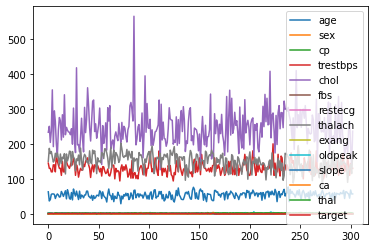

In [2]:
df.plot()

In [3]:
#Checking the feature data types and getting the target
NUM_INPUT = ['age','trestbps','chol','thalach','oldpeak']
CAT_INPUT = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
X = df[CAT_INPUT + NUM_INPUT]
Y = df['target']
X_CAT = df[CAT_INPUT]
X_NUM = df[NUM_INPUT]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [5]:
model = ols('target ~ age + trestbps + chol + thalach + oldpeak + sex + cp + fbs + restecg + exang + slope + ca + thal', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           1.49e-38
Time:                        00:00:52   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8289      0.293      2.830      0.005       0.252       1.405
age           -0.0008      0.003     -0.304      0.761      -0.006       0.004
trestbps      -0.0020      0.001     -1.583      0.114      -0.004       0.000
chol          -0.0004      0.000     -0.838      0.403      -0.001       0.000
thalach        0.0030      0.001      2.671      0.008       0.001       0.005
oldpeak       -0.0588      0.023     -2.564      0.011      -0.104      -0.014
sex           -0.1960      0.047     -4.157      0.000      -0.289      -0.103
cp             0.1127      0.022      5.036      0.000       0.069       0.157
fbs            0.0174      0.060      0.291      0.771      -0.100       0.135
restecg        0.0498      0.040      1.249      0.213      -0.029       0.128
exang         -0.1440      0.051     -2.804      0.005      -0.245      -0.043
slope          0.0790      0.042      1.863      0.063      -0.004       0.162
ca            -0.1006      0.022     -4.603      0.000      -0.144      -0.058
thal          -0.1190      0.036     -3.339      0.001      -0.189      -0.049
==============================================================================
Omnibus:                        6.751   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.958
Skew:                          -0.361   Prob(JB):                       0.0308
Kurtosis:                       2.824   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,3.819244,3.819244,30.444055,7.639750e-08
trestbps,1.0,0.547462,0.547462,4.363941,3.758196e-02
chol,1.0,0.078118,0.078118,0.622699,4.306930e-01
thalach,1.0,10.448169,10.448169,83.284713,1.257500e-17
oldpeak,1.0,6.033198,6.033198,48.091984,2.663757e-11
sex,1.0,5.125907,5.125907,40.859763,6.543289e-10
cp,1.0,6.802867,6.802867,54.227190,1.872239e-12
fbs,1.0,0.030446,0.030446,0.242689,6.226444e-01
restecg,1.0,0.241810,0.241810,1.927522,1.660990e-01
exang,1.0,1.171884,1.171884,9.341351,2.449808e-03


# Feature Selection

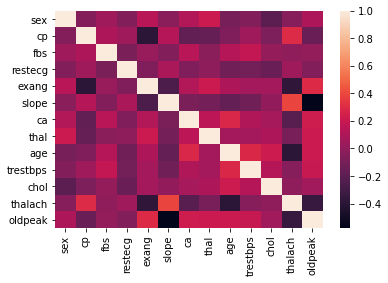

In [7]:
# ploting the corelation matrix 
import seaborn as sns
correlation_matrix = X.corr()
ax = sns.heatmap(correlation_matrix, annot=False)
# No Higly correlated features

We found that there isnt any highly correlated data. Next we need to reduce the features, RFE with cross validation is used to calculate the number of features.It should be noted that we dont have any limitations for the number of features. 

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn import datasets
from statsmodels.api import Logit, MNLogit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

0.868421052631579


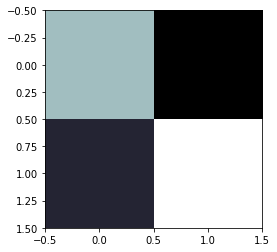

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25)

model = LogisticRegression(max_iter=8500,solver='saga')

model.fit(X_train,y_train)

predicted = model.predict(X_test)
print(accuracy_score(predicted,y_test))
confusion_matrix(predicted,y_test)
plt.imshow(confusion_matrix(predicted,y_test),cmap='bone')


Optimal number of features: 13


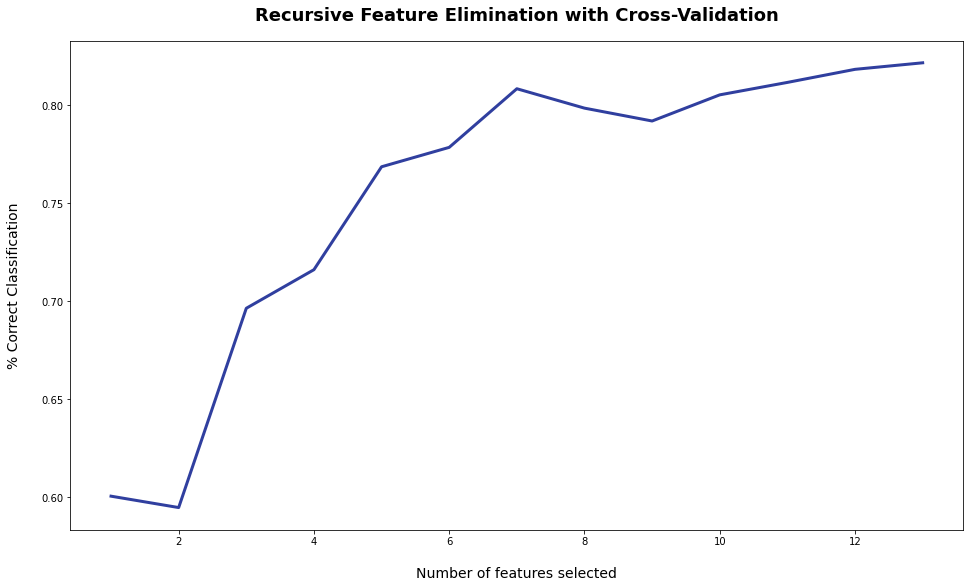

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
lr = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, Y)
print('Optimal number of features: {}'.format(rfecv.n_features_))

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In Random Forest Classification it was seen that it has converged. It is seen that all features are needed to acheive the highest accuracy (13 features). Therefore it is recommended to use all the features. 

# Model Selection

Have used 4 algorithms to train the dataset.
* KNN
* SVM
* Decision Tree
* Random Forest

In [11]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge, Lasso, ElasticNet

sc = StandardScaler()

knn  = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier())])
svc  = Pipeline([('scaler', StandardScaler()), ('model', SVC())])
dt   = Pipeline([ ('model', DecisionTreeClassifier())])
rfc  = Pipeline([ ('model', RandomForestClassifier())])
ridge  = Pipeline([ ('model', Ridge())])
lasso  = Pipeline([ ('model', Lasso())])
elasticnet  = Pipeline([ ('model', ElasticNet())])


MODELS = [knn,svc,dt,rfc,ridge,lasso, elasticnet]

kf = KFold(n_splits=5, shuffle = True, random_state = 0)

for model in MODELS:
    scores = np.mean(cross_val_score(model, X, Y, cv=kf))
    print("%15s" %type(model['model']).__name__ ,"\t",scores)


KNeighborsClassifier 	 0.8185245901639344
            SVC 	 0.8218579234972678
DecisionTreeClassifier 	 0.739344262295082
RandomForestClassifier 	 0.8185792349726775
          Ridge 	 0.45202479094396325
          Lasso 	 0.14912583802231225
     ElasticNet 	 0.16278006018476956


According to the cross validated scores, SVM was selected


In [12]:
model3 = DecisionTreeClassifier(max_depth=3,criterion='gini')

model3.fit(X_train,y_train)
model3.score(X_test,y_test)


0.7894736842105263

[Text(1860.0, 3171.0, 'X[7] <= 2.5\ngini = 0.495\nsamples = 227\nvalue = [102, 125]'),
 Text(930.0, 2265.0, 'X[6] <= 0.5\ngini = 0.368\nsamples = 136\nvalue = [33, 103]'),
 Text(465.0, 1359.0, 'X[12] <= 1.7\ngini = 0.199\nsamples = 89\nvalue = [10, 79]'),
 Text(232.5, 453.0, 'gini = 0.137\nsamples = 81\nvalue = [6, 75]'),
 Text(697.5, 453.0, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(1395.0, 1359.0, 'X[1] <= 0.5\ngini = 0.5\nsamples = 47\nvalue = [23, 24]'),
 Text(1162.5, 453.0, 'gini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(1627.5, 453.0, 'gini = 0.311\nsamples = 26\nvalue = [5, 21]'),
 Text(2790.0, 2265.0, 'X[1] <= 0.5\ngini = 0.367\nsamples = 91\nvalue = [69, 22]'),
 Text(2325.0, 1359.0, 'X[12] <= 0.65\ngini = 0.18\nsamples = 60\nvalue = [54, 6]'),
 Text(2092.5, 453.0, 'gini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(2557.5, 453.0, 'gini = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(3255.0, 1359.0, 'X[11] <= 142.5\ngini = 0.499\nsamples = 31\nvalue = [15, 16]'),
 

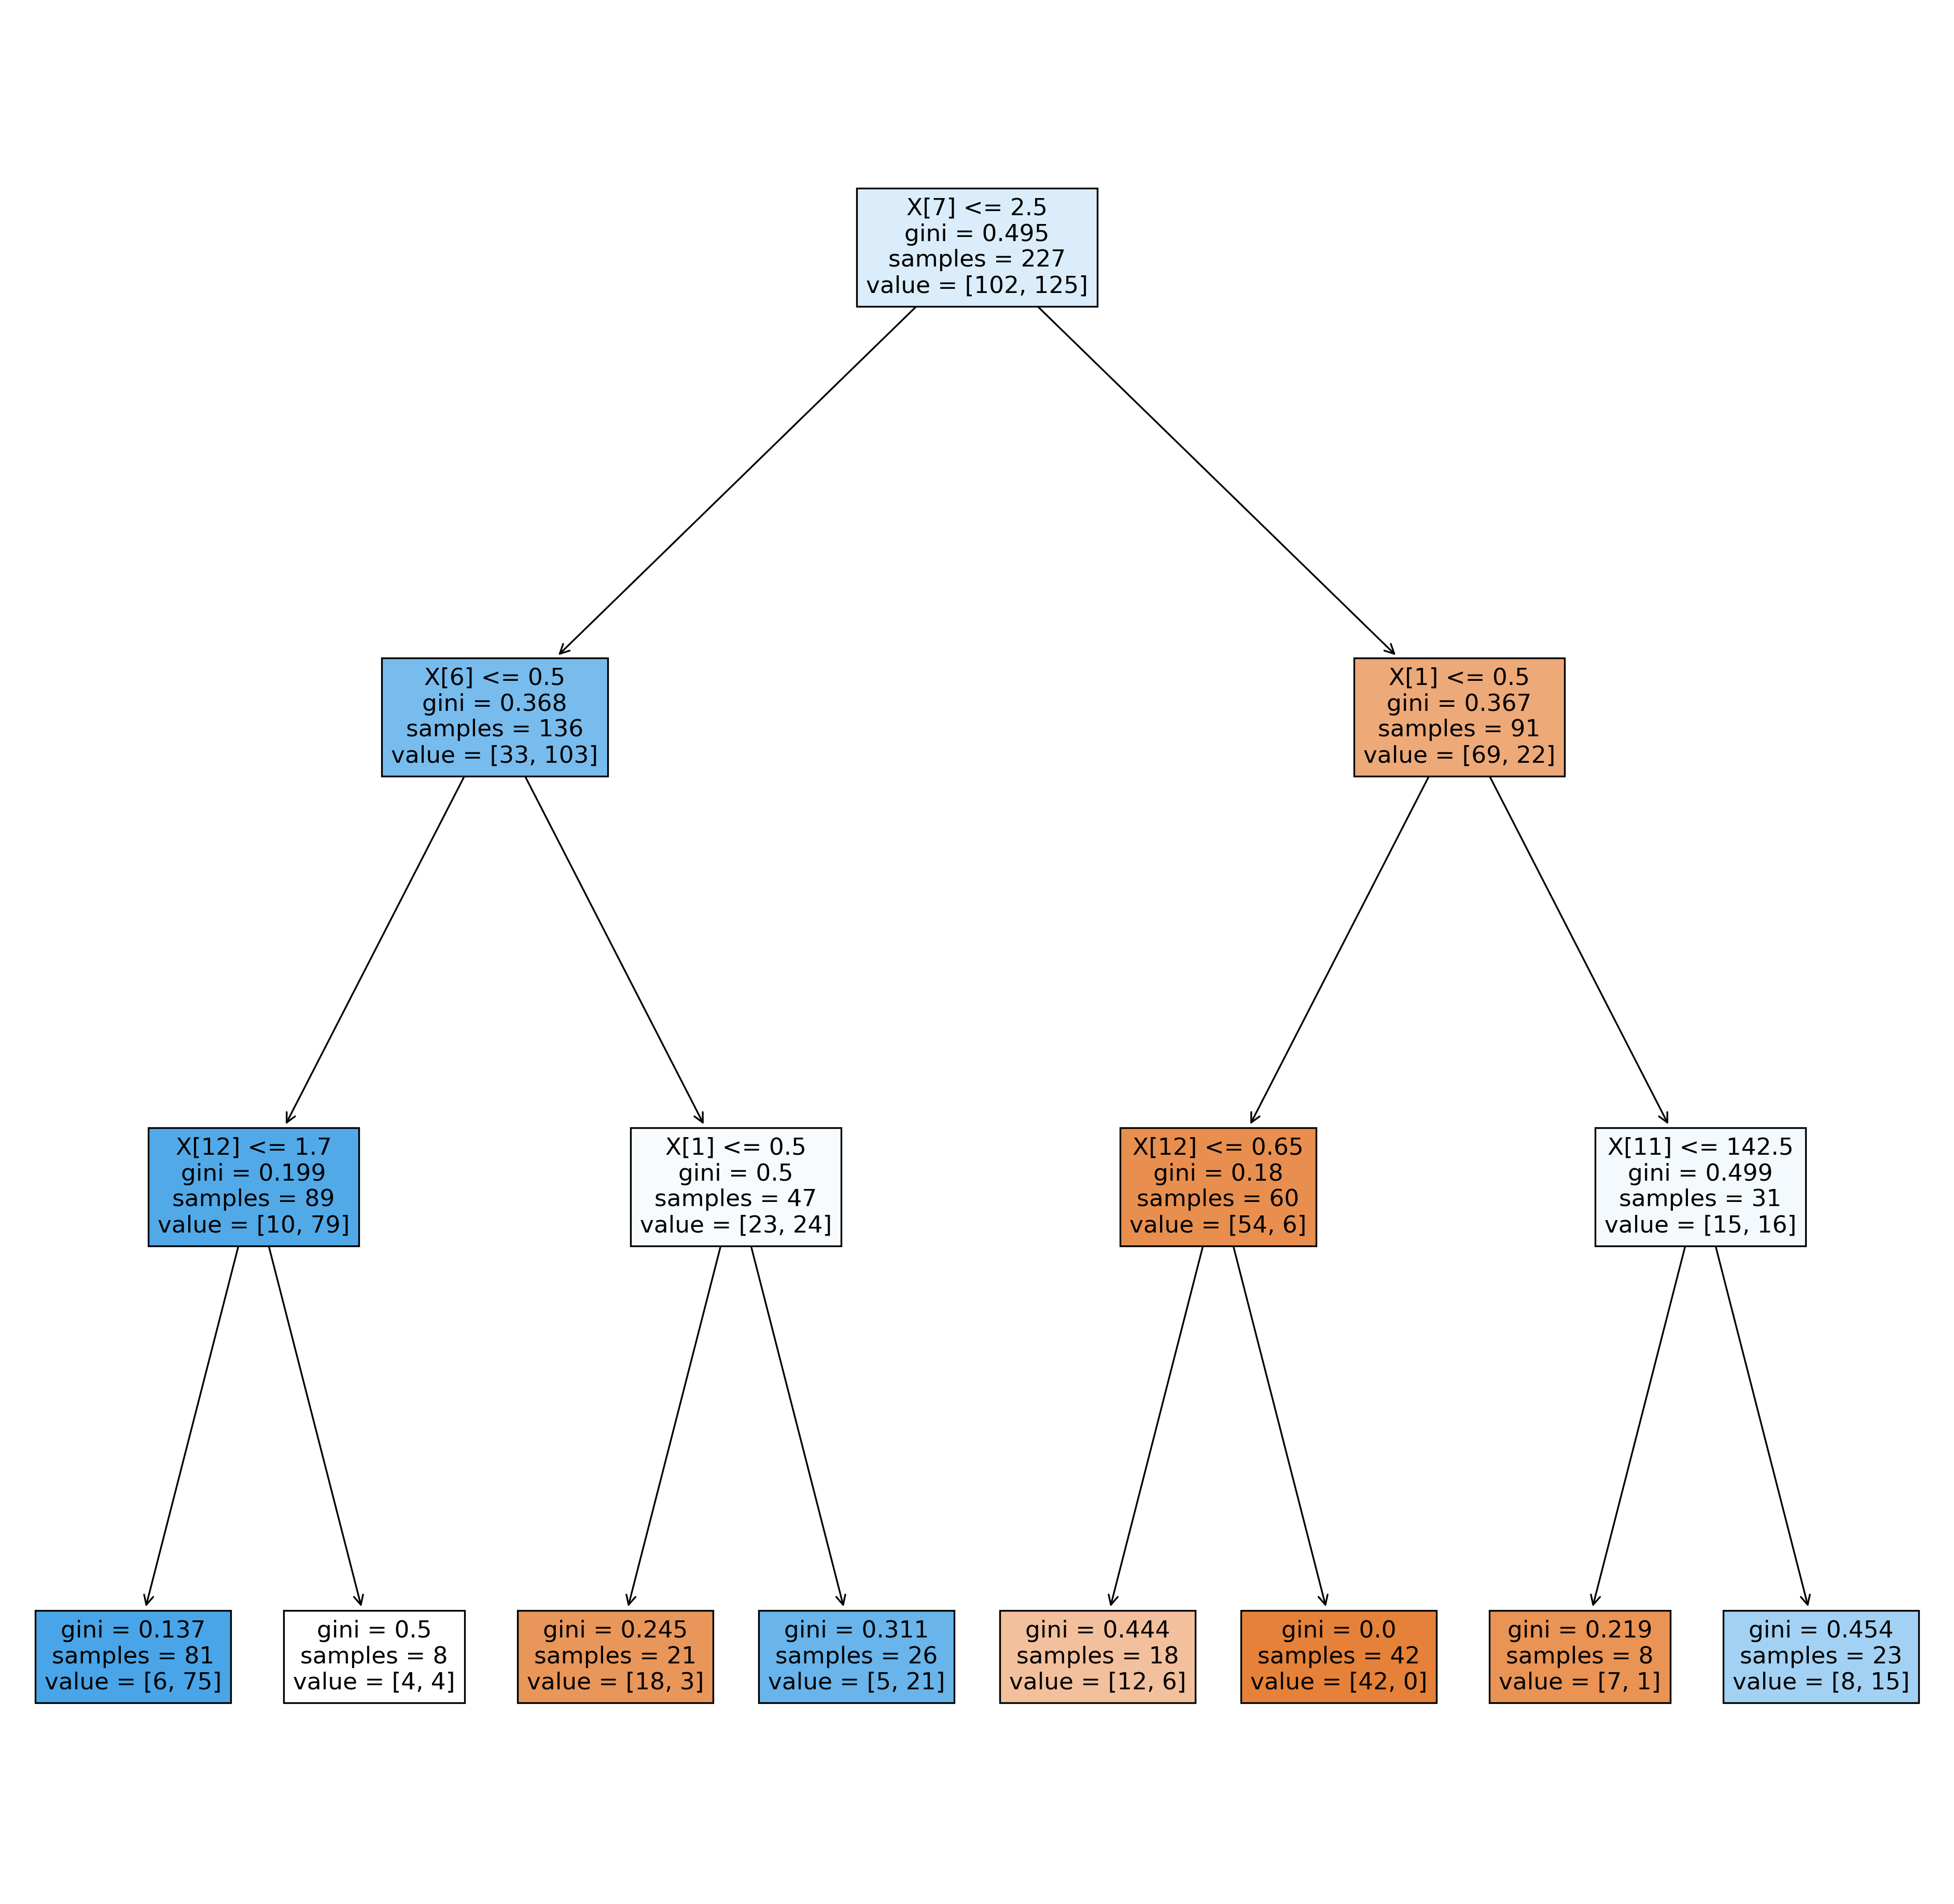

In [13]:
from sklearn import tree

plt.figure(figsize=(20,20), dpi=240)
tree.plot_tree(model3,
               filled = True)

# Overfit/Underfit analysis

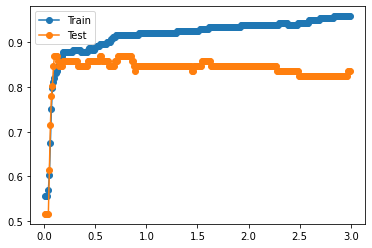

In [14]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
#scaling X 

X_array = sc.fit_transform(X)
X = pd.DataFrame(X_array,columns = X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,shuffle = True,random_state=101)

C_values = np.arange(0.01, 3,0.01)
train_scores = []
test_scores = []

for i in C_values:
    model = SVC(C=i)
    model.fit(X_train, Y_train)
    train_predict = model.predict(X_train)
    train_acc = accuracy_score(Y_train, train_predict)
    train_scores.append(train_acc)
    test_predict = model.predict(X_test)
    test_acc = accuracy_score(Y_test, test_predict)
    test_scores.append(test_acc)
    #print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(C_values, train_scores, '-o', label='Train')
pyplot.plot(C_values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Based on the above grapgh, it can be concluded that C value greater than 1 is overfitting.
Therefore C we will optimize C parameter between 0 and 1.


# Hyperparameter optimization

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': np.arange(0.01, 1,0.01), 'kernel': ['linear']},
  {'C': np.arange(0.01, 1,0.01), 'gamma': [0.01,0.001, 0.0001], 'kernel': ['rbf']},
 ]

svc = SVC()
gs = GridSearchCV(svc, param_grid=param_grid, cv=3, n_jobs = -1, verbose = 0)
gs.fit(X, Y)

optimal_parameter = gs.best_params_
print(optimal_parameter)

{'C': 0.02, 'kernel': 'linear'}


In [16]:
#calculating the final score 
kf = KFold(n_splits=5, shuffle = True, random_state = 0)
scores = np.mean(cross_val_score(SVC(C=0.02,kernel='linear'), X, Y, cv=kf))
print(scores)

0.8350273224043716


After the optimization, it can be seen that the accuracy has been increased to 0.83. 

In [17]:
import tensorflow as tf
import keras as ks
from sklearn.preprocessing import LabelBinarizer
from keras.datasets import mnist, fashion_mnist
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM, Embedding
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [18]:
labeler = LabelBinarizer()
y = labeler.fit_transform(Y)

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [19]:
y_train

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [20]:
y_train.shape

(227, 1)

In [21]:
model = ks.models.Sequential()

model.add(ks.layers.Dense(227, activation='relu', input_dim=13))
model.add(ks.layers.Dense(1,activation='sigmoid'))

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

model.fit(x_train,y_train,epochs=10,batch_size=100)

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 0.6734 - binary_accuracy: 0.4934
Epoch 2/10
3/3 [==============================] - 0s 3ms/step - loss: 0.6154 - binary_accuracy: 0.6916
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.5674 - binary_accuracy: 0.7401
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 0.5280 - binary_accuracy: 0.7885
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4938 - binary_accuracy: 0.8018
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 0.4664 - binary_accuracy: 0.8062
Epoch 7/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4436 - binary_accuracy: 0.8194
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4256 - binary_accuracy: 0.8106
Epoch 9/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4107 - binary_accuracy: 0.8150
Epoch 10/10
3/3 [==============================] - 0s 3ms/step - loss: 0.

In [23]:
y_pred = model.predict(x_test)
yy_pred = np.argmax(y_pred,axis=1)
yy_test = np.argmax(y_test,axis=1)

print(accuracy_score(yy_test,yy_pred))
confusion_matrix(yy_test,yy_pred)

1.0


array([[76]], dtype=int64)

In [24]:
labeler = LabelBinarizer()
yy_news = labeler.fit_transform(Y)

x_train, x_test, y_train, y_test = train_test_split(X,yy_news)
x_train.shape

(227, 13)

In [25]:
model = ks.Sequential()

model.add(Embedding(input_dim=x_train.shape[1], output_dim=128))
model.add(Dense(128,activation='relu'))
model.add(Dense(20,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1664      
                                                                 
 dense_2 (Dense)             (None, None, 128)         16512     
                                                                 
 dense_3 (Dense)             (None, None, 20)          2580      
                                                                 
Total params: 20,756
Trainable params: 20,756
Non-trainable params: 0
_________________________________________________________________
